# What is the Learning Rate in Deep Learning?
Neural networks have many hyperparameters that affect the model’s performance. One of the **essential hyperparameters** is the learning rate (LR), which determines how much the model weights change between training steps. In the simplest case, the LR value is a fixed value between 0 and 1.

However, choosing the correct LR value can be challenging. On the one hand, a **large learning rate** can help the algorithm to converge quickly. But it can also cause the algorithm to bounce around the minimum without reaching it or even jumping over it if it is too large. On the other hand, **a small learning rate** can converge better to the minimum. However, the optimizer may take too long to converge or get stuck in a plateau if it is too small.

## What is a Learning Rate Scheduler?
One solution to help the algorithm **converge quickly to an optimum** is to use a learning rate scheduler. A learning rate scheduler adjusts the learning rate according to a pre-defined schedule during the training process.



In [ ]:
import torch

### StepLR


The StepLR reduces the learning rate by a multiplicative factor after every predefined number of training steps.



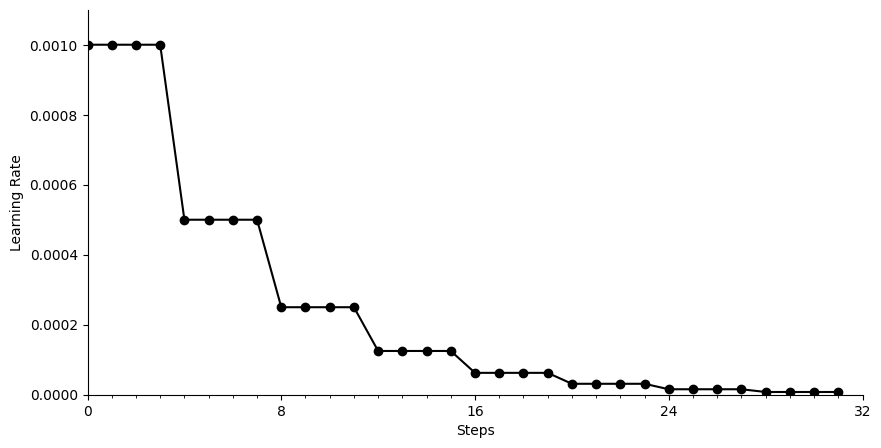

In [ ]:
from torch.optim.lr_scheduler import StepLR
from torch.optim.lr_scheduler import StepLR # Import your choice of scheduler here
from torch.optim.lr_scheduler import ExponentialLR

import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

LEARNING_RATE = 1e-3
EPOCHS = 4
STEPS_IN_EPOCH = 8

# Set model and optimizer
model = torch.nn.Linear(2, 1)
optimizer = torch.optim.SGD(model.parameters(), lr=LEARNING_RATE)

# Define your scheduler here as described above
scheduler = StepLR(optimizer,
                   step_size = 4, # Period of learning rate decay
                   gamma = 0.5) # Multiplicative factor of learning rate decay

# Get learning rates as each training step
learning_rates = []

for i in range(EPOCHS*STEPS_IN_EPOCH):
    optimizer.step()
    learning_rates.append(optimizer.param_groups[0]["lr"])
    scheduler.step()

# Visualize learinig rate scheduler
fig, ax = plt.subplots(1,1, figsize=(10,5))
ax.plot(range(EPOCHS*STEPS_IN_EPOCH),
        learning_rates,
        marker='o',
        color='black')
ax.set_xlim([0, EPOCHS*STEPS_IN_EPOCH])
ax.set_ylim([0, LEARNING_RATE + 0.0001])
ax.set_xlabel('Steps')
ax.set_ylabel('Learning Rate')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.xaxis.set_major_locator(MultipleLocator(STEPS_IN_EPOCH))
ax.xaxis.set_minor_locator(MultipleLocator(1))
plt.show()

### MultiStepLR


The MultiStepLR — similarly to the StepLR — also reduces the learning rate by a multiplicative factor but after each pre-defined milestone.



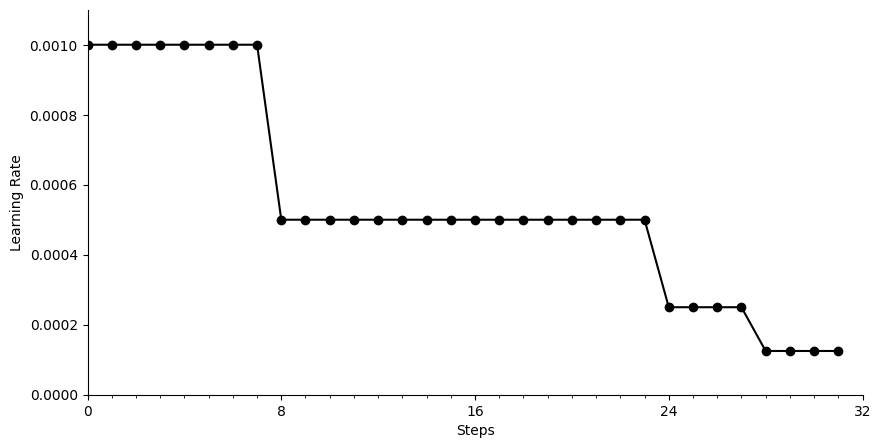

In [ ]:
from torch.optim.lr_scheduler import MultiStepLR
from torch.optim.lr_scheduler import StepLR # Import your choice of scheduler here
from torch.optim.lr_scheduler import ExponentialLR

import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

LEARNING_RATE = 1e-3
EPOCHS = 4
STEPS_IN_EPOCH = 8

# Set model and optimizer
model = torch.nn.Linear(2, 1)
optimizer = torch.optim.SGD(model.parameters(), lr=LEARNING_RATE)

# Define your scheduler here as described above
scheduler = MultiStepLR(optimizer,
                        milestones=[8, 24, 28], # List of epoch indices
                        gamma =0.5) # Multiplicative factor of learning rate decay

# Get learning rates as each training step
learning_rates = []

for i in range(EPOCHS*STEPS_IN_EPOCH):
    optimizer.step()
    learning_rates.append(optimizer.param_groups[0]["lr"])
    scheduler.step()

# Visualize learinig rate scheduler
fig, ax = plt.subplots(1,1, figsize=(10,5))
ax.plot(range(EPOCHS*STEPS_IN_EPOCH),
        learning_rates,
        marker='o',
        color='black')
ax.set_xlim([0, EPOCHS*STEPS_IN_EPOCH])
ax.set_ylim([0, LEARNING_RATE + 0.0001])
ax.set_xlabel('Steps')
ax.set_ylabel('Learning Rate')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.xaxis.set_major_locator(MultipleLocator(STEPS_IN_EPOCH))
ax.xaxis.set_minor_locator(MultipleLocator(1))
plt.show()

### ConstantLR

The ConstantLR reduces learning rate by a multiplicative factor until the number of training steps reaches a pre-defined milestone.



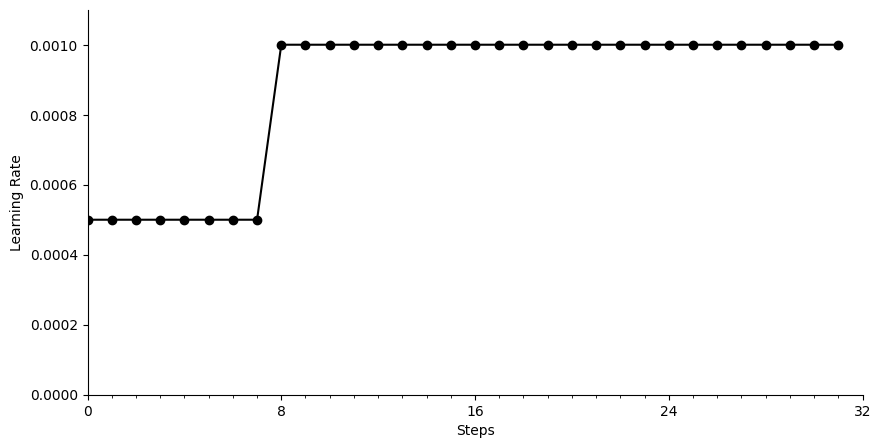

In [ ]:
from torch.optim.lr_scheduler import ConstantLR
from torch.optim.lr_scheduler import StepLR # Import your choice of scheduler here
from torch.optim.lr_scheduler import ExponentialLR

import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

LEARNING_RATE = 1e-3
EPOCHS = 4
STEPS_IN_EPOCH = 8

# Set model and optimizer
model = torch.nn.Linear(2, 1)
optimizer = torch.optim.SGD(model.parameters(), lr=LEARNING_RATE)

# Define your scheduler here as described above
scheduler = ConstantLR(optimizer,
                       factor = 0.5, # The number we multiply learning rate until the milestone.
                       total_iters = 8) # The number of steps that the scheduler decays the learning rate

# Get learning rates as each training step
learning_rates = []

for i in range(EPOCHS*STEPS_IN_EPOCH):
    optimizer.step()
    learning_rates.append(optimizer.param_groups[0]["lr"])
    scheduler.step()

# Visualize learinig rate scheduler
fig, ax = plt.subplots(1,1, figsize=(10,5))
ax.plot(range(EPOCHS*STEPS_IN_EPOCH),
        learning_rates,
        marker='o',
        color='black')
ax.set_xlim([0, EPOCHS*STEPS_IN_EPOCH])
ax.set_ylim([0, LEARNING_RATE + 0.0001])
ax.set_xlabel('Steps')
ax.set_ylabel('Learning Rate')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.xaxis.set_major_locator(MultipleLocator(STEPS_IN_EPOCH))
ax.xaxis.set_minor_locator(MultipleLocator(1))
plt.show()

### LinearLR

The LinearLR — similarly to the ConstantLR— also reduces the learning rate by a multiplicative factor at the beginning of the training. But it linearly increases the learning rate over a defined number of training steps until it reaches its originally set learning rate.



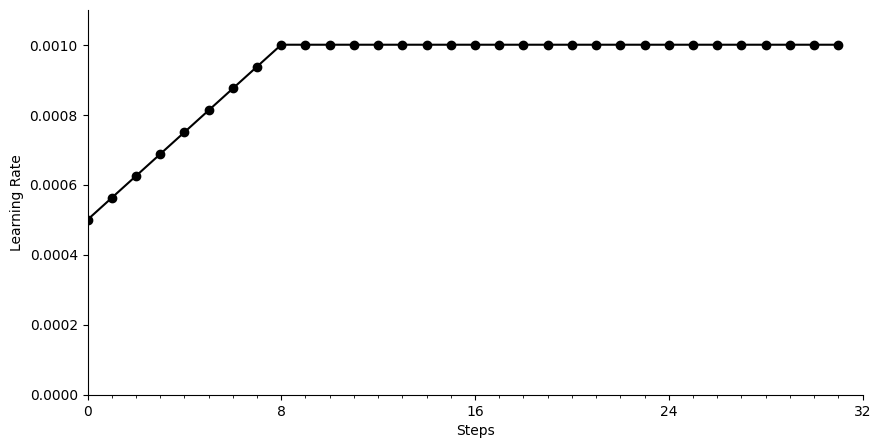

In [ ]:
from torch.optim.lr_scheduler import LinearLR
from torch.optim.lr_scheduler import StepLR # Import your choice of scheduler here
from torch.optim.lr_scheduler import ExponentialLR

import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

LEARNING_RATE = 1e-3
EPOCHS = 4
STEPS_IN_EPOCH = 8

# Set model and optimizer
model = torch.nn.Linear(2, 1)
optimizer = torch.optim.SGD(model.parameters(), lr=LEARNING_RATE)

# Define your scheduler here as described above
scheduler = LinearLR(optimizer,
                     start_factor = 0.5, # The number we multiply learning rate in the first epoch
                     total_iters = 8) # The number of iterations that multiplicative factor reaches to 1

# Get learning rates as each training step
learning_rates = []

for i in range(EPOCHS*STEPS_IN_EPOCH):
    optimizer.step()
    learning_rates.append(optimizer.param_groups[0]["lr"])
    scheduler.step()

# Visualize learinig rate scheduler
fig, ax = plt.subplots(1,1, figsize=(10,5))
ax.plot(range(EPOCHS*STEPS_IN_EPOCH),
        learning_rates,
        marker='o',
        color='black')
ax.set_xlim([0, EPOCHS*STEPS_IN_EPOCH])
ax.set_ylim([0, LEARNING_RATE + 0.0001])
ax.set_xlabel('Steps')
ax.set_ylabel('Learning Rate')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.xaxis.set_major_locator(MultipleLocator(STEPS_IN_EPOCH))
ax.xaxis.set_minor_locator(MultipleLocator(1))
plt.show()

If your starting factor is smaller than 1, this learning rate scheduler also increases the learning rate over the course of the training process instead of decreasing it.



### ExponentialLR

The ExponentialLR reduces learning rate by a multiplicative factor at every training step.



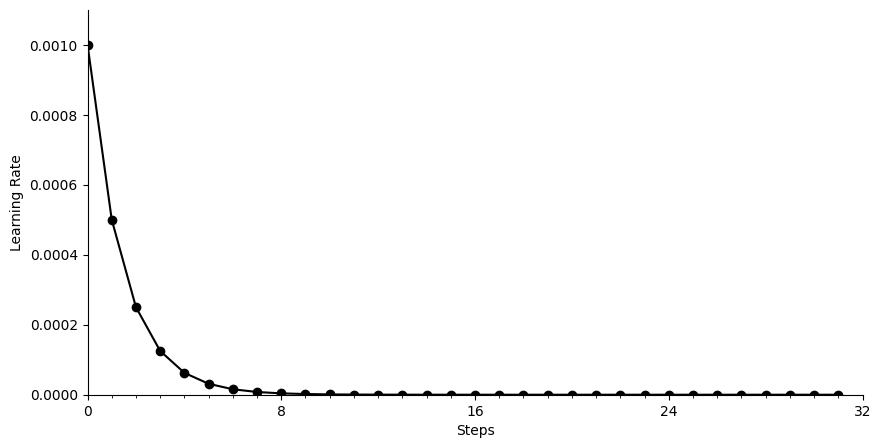

In [ ]:
from torch.optim.lr_scheduler import ExponentialLR
from torch.optim.lr_scheduler import StepLR # Import your choice of scheduler here
from torch.optim.lr_scheduler import ExponentialLR

import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

LEARNING_RATE = 1e-3
EPOCHS = 4
STEPS_IN_EPOCH = 8

# Set model and optimizer
model = torch.nn.Linear(2, 1)
optimizer = torch.optim.SGD(model.parameters(), lr=LEARNING_RATE)

# Define your scheduler here as described above
scheduler = ExponentialLR(optimizer,
                          gamma = 0.5) # Multiplicative factor of learning rate decay.

# Get learning rates as each training step
learning_rates = []

for i in range(EPOCHS*STEPS_IN_EPOCH):
    optimizer.step()
    learning_rates.append(optimizer.param_groups[0]["lr"])
    scheduler.step()

# Visualize learinig rate scheduler
fig, ax = plt.subplots(1,1, figsize=(10,5))
ax.plot(range(EPOCHS*STEPS_IN_EPOCH),
        learning_rates,
        marker='o',
        color='black')
ax.set_xlim([0, EPOCHS*STEPS_IN_EPOCH])
ax.set_ylim([0, LEARNING_RATE + 0.0001])
ax.set_xlabel('Steps')
ax.set_ylabel('Learning Rate')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.xaxis.set_major_locator(MultipleLocator(STEPS_IN_EPOCH))
ax.xaxis.set_minor_locator(MultipleLocator(1))
plt.show()

### PolynomialLR


The PolynomialLR reduces learning rate by using a polynomial function for a defined number of steps.



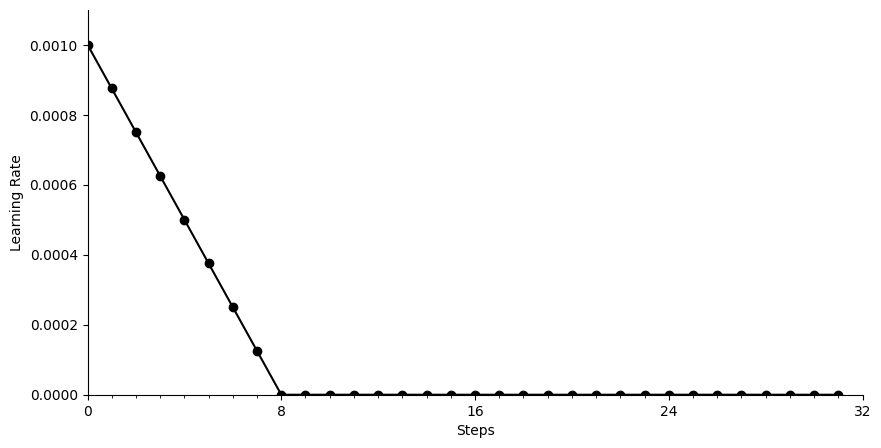

In [ ]:
from torch.optim.lr_scheduler import PolynomialLR
from torch.optim.lr_scheduler import StepLR # Import your choice of scheduler here
from torch.optim.lr_scheduler import ExponentialLR

import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

LEARNING_RATE = 1e-3
EPOCHS = 4
STEPS_IN_EPOCH = 8

# Set model and optimizer
model = torch.nn.Linear(2, 1)
optimizer = torch.optim.SGD(model.parameters(), lr=LEARNING_RATE)

# Define your scheduler here as described above
scheduler = PolynomialLR(optimizer,
                         total_iters = 8, # The number of steps that the scheduler decays the learning rate.
                         power = 1) # The power of the polynomial.

# Get learning rates as each training step
learning_rates = []

for i in range(EPOCHS*STEPS_IN_EPOCH):
    optimizer.step()
    learning_rates.append(optimizer.param_groups[0]["lr"])
    scheduler.step()

# Visualize learinig rate scheduler
fig, ax = plt.subplots(1,1, figsize=(10,5))
ax.plot(range(EPOCHS*STEPS_IN_EPOCH),
        learning_rates,
        marker='o',
        color='black')
ax.set_xlim([0, EPOCHS*STEPS_IN_EPOCH])
ax.set_ylim([0, LEARNING_RATE + 0.0001])
ax.set_xlabel('Steps')
ax.set_ylabel('Learning Rate')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.xaxis.set_major_locator(MultipleLocator(STEPS_IN_EPOCH))
ax.xaxis.set_minor_locator(MultipleLocator(1))
plt.show()

### CosineAnnealingLR


The CosineAnnealingLR reduces learning rate by a cosine function.

While you could technically schedule the learning rate adjustments to follow multiple periods, the idea is to decay the learning rate over half a period for the maximum number of iterations.



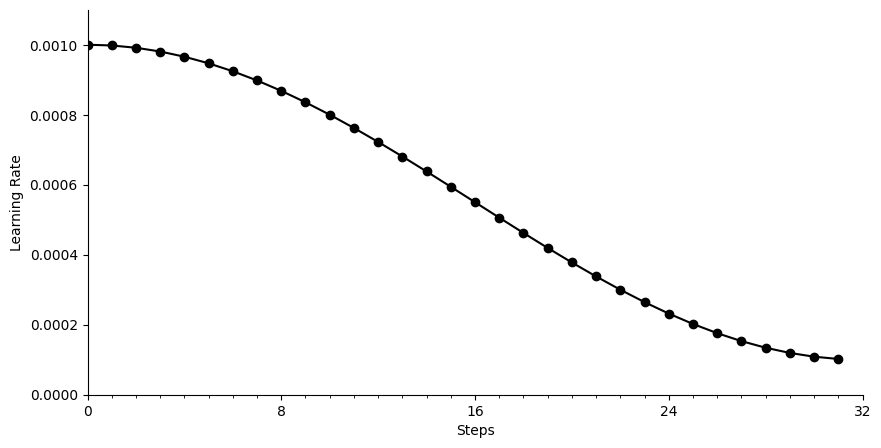

In [ ]:
from torch.optim.lr_scheduler import CosineAnnealingLR
from torch.optim.lr_scheduler import StepLR # Import your choice of scheduler here
from torch.optim.lr_scheduler import ExponentialLR

import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

LEARNING_RATE = 1e-3
EPOCHS = 4
STEPS_IN_EPOCH = 8

# Set model and optimizer
model = torch.nn.Linear(2, 1)
optimizer = torch.optim.SGD(model.parameters(), lr=LEARNING_RATE)

# Define your scheduler here as described above
scheduler = CosineAnnealingLR(optimizer,
                              T_max = 32, # Maximum number of iterations.
                             eta_min = 1e-4) # Minimum learning rate.

# Get learning rates as each training step
learning_rates = []

for i in range(EPOCHS*STEPS_IN_EPOCH):
    optimizer.step()
    learning_rates.append(optimizer.param_groups[0]["lr"])
    scheduler.step()

# Visualize learinig rate scheduler
fig, ax = plt.subplots(1,1, figsize=(10,5))
ax.plot(range(EPOCHS*STEPS_IN_EPOCH),
        learning_rates,
        marker='o',
        color='black')
ax.set_xlim([0, EPOCHS*STEPS_IN_EPOCH])
ax.set_ylim([0, LEARNING_RATE + 0.0001])
ax.set_xlabel('Steps')
ax.set_ylabel('Learning Rate')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.xaxis.set_major_locator(MultipleLocator(STEPS_IN_EPOCH))
ax.xaxis.set_minor_locator(MultipleLocator(1))
plt.show()

### CosineAnnealingWarmRestartsLR


The CosineAnnealingWarmRestarts is similar to the cosine annealing schedule. However, it allows you to restart the LR schedule with the initial LR at, e.g., each epoch.



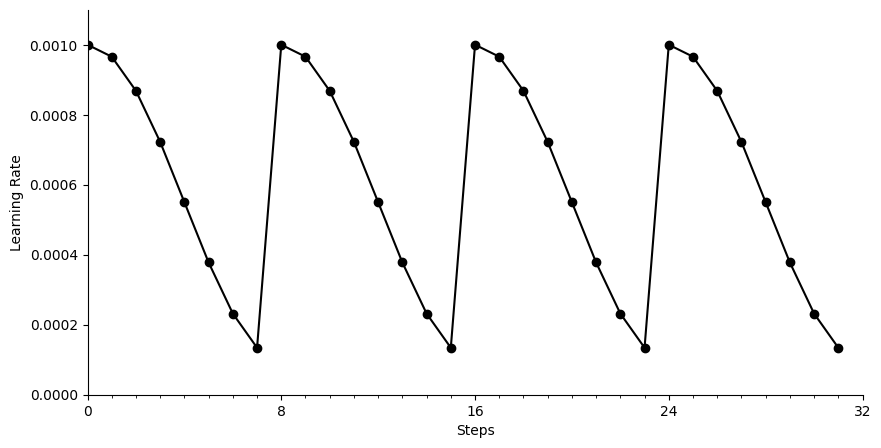

In [ ]:
from torch.optim.lr_scheduler import CosineAnnealingWarmRestarts
from torch.optim.lr_scheduler import StepLR # Import your choice of scheduler here
from torch.optim.lr_scheduler import ExponentialLR

import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

LEARNING_RATE = 1e-3
EPOCHS = 4
STEPS_IN_EPOCH = 8

# Set model and optimizer
model = torch.nn.Linear(2, 1)
optimizer = torch.optim.SGD(model.parameters(), lr=LEARNING_RATE)

# Define your scheduler here as described above
scheduler = CosineAnnealingWarmRestarts(optimizer,
                                        T_0 = 8,# Number of iterations for the first restart
                                        T_mult = 1, # A factor increases TiTi​ after a restart
                                        eta_min = 1e-4) # Minimum learning rate

# Get learning rates as each training step
learning_rates = []

for i in range(EPOCHS*STEPS_IN_EPOCH):
    optimizer.step()
    learning_rates.append(optimizer.param_groups[0]["lr"])
    scheduler.step()

# Visualize learinig rate scheduler
fig, ax = plt.subplots(1,1, figsize=(10,5))
ax.plot(range(EPOCHS*STEPS_IN_EPOCH),
        learning_rates,
        marker='o',
        color='black')
ax.set_xlim([0, EPOCHS*STEPS_IN_EPOCH])
ax.set_ylim([0, LEARNING_RATE + 0.0001])
ax.set_xlabel('Steps')
ax.set_ylabel('Learning Rate')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.xaxis.set_major_locator(MultipleLocator(STEPS_IN_EPOCH))
ax.xaxis.set_minor_locator(MultipleLocator(1))
plt.show()

### CyclicLR


The CyclicLR adjusted the learning rate according to a cyclical learning rate policy, which is based on the concept of warm restarts which we just discussed in the previous section. In PyTorch there are three built-in policies.



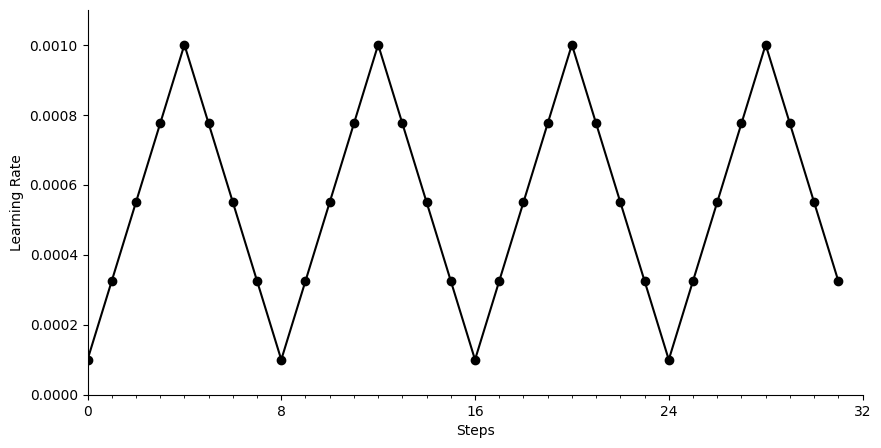

In [ ]:
from torch.optim.lr_scheduler import CyclicLR
from torch.optim.lr_scheduler import StepLR # Import your choice of scheduler here
from torch.optim.lr_scheduler import ExponentialLR

import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

LEARNING_RATE = 1e-3
EPOCHS = 4
STEPS_IN_EPOCH = 8

# Set model and optimizer
model = torch.nn.Linear(2, 1)
optimizer = torch.optim.SGD(model.parameters(), lr=LEARNING_RATE)

# Define your scheduler here as described above
scheduler = CyclicLR(optimizer,
                     base_lr = 0.0001, # Initial learning rate which is the lower boundary in the cycle for each parameter group
                     max_lr = 1e-3, # Upper learning rate boundaries in the cycle for each parameter group
                     step_size_up = 4, # Number of training iterations in the increasing half of a cycle
                     mode = "triangular")

# Get learning rates as each training step
learning_rates = []

for i in range(EPOCHS*STEPS_IN_EPOCH):
    optimizer.step()
    learning_rates.append(optimizer.param_groups[0]["lr"])
    scheduler.step()

# Visualize learinig rate scheduler
fig, ax = plt.subplots(1,1, figsize=(10,5))
ax.plot(range(EPOCHS*STEPS_IN_EPOCH),
        learning_rates,
        marker='o',
        color='black')
ax.set_xlim([0, EPOCHS*STEPS_IN_EPOCH])
ax.set_ylim([0, LEARNING_RATE + 0.0001])
ax.set_xlabel('Steps')
ax.set_ylabel('Learning Rate')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.xaxis.set_major_locator(MultipleLocator(STEPS_IN_EPOCH))
ax.xaxis.set_minor_locator(MultipleLocator(1))
plt.show()

### OneCycleLR

The OneCycleLR reduces learning rate according to the 1cycle learning rate policy, which was introduced in a paper in 2017 [3].

In contrast to many other learning rate schedulers, the learning rate is not only decreased over the training process. Instead, the learning rate increases from an initial learning rate to some maximum learning rate and then decreases again.

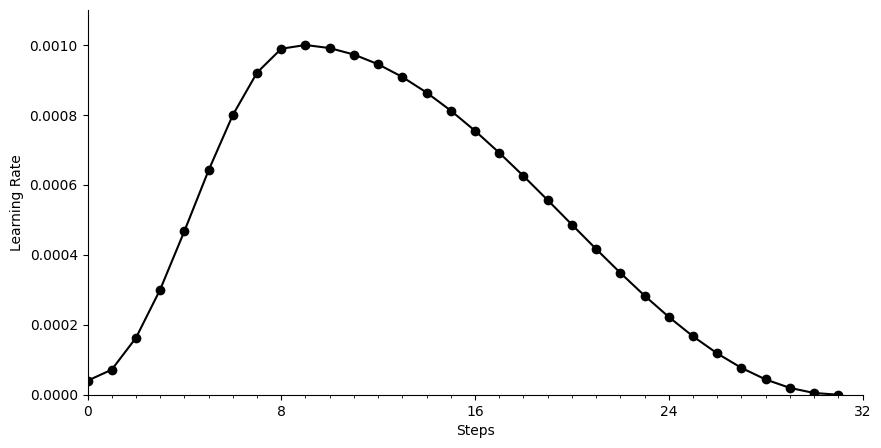

In [ ]:
from torch.optim.lr_scheduler import OneCycleLR
from torch.optim.lr_scheduler import StepLR # Import your choice of scheduler here
from torch.optim.lr_scheduler import ExponentialLR

import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

LEARNING_RATE = 1e-3
EPOCHS = 4
STEPS_IN_EPOCH = 8

# Set model and optimizer
model = torch.nn.Linear(2, 1)
optimizer = torch.optim.SGD(model.parameters(), lr=LEARNING_RATE)

# Define your scheduler here as described above
scheduler = OneCycleLR(optimizer,
                       max_lr = 1e-3, # Upper learning rate boundaries in the cycle for each parameter group
                       steps_per_epoch = 8, # The number of steps per epoch to train for.
                       epochs = 4, # The number of epochs to train for.
                       anneal_strategy = 'cos') # Specifies the annealing strategy

# Get learning rates as each training step
learning_rates = []

for i in range(EPOCHS*STEPS_IN_EPOCH):
    optimizer.step()
    learning_rates.append(optimizer.param_groups[0]["lr"])
    scheduler.step()

# Visualize learinig rate scheduler
fig, ax = plt.subplots(1,1, figsize=(10,5))
ax.plot(range(EPOCHS*STEPS_IN_EPOCH),
        learning_rates,
        marker='o',
        color='black')
ax.set_xlim([0, EPOCHS*STEPS_IN_EPOCH])
ax.set_ylim([0, LEARNING_RATE + 0.0001])
ax.set_xlabel('Steps')
ax.set_ylabel('Learning Rate')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.xaxis.set_major_locator(MultipleLocator(STEPS_IN_EPOCH))
ax.xaxis.set_minor_locator(MultipleLocator(1))
plt.show()

### Custom Learning Rate Schedulers with Lambda Functions


If the built-in learning rate schedulers don’t fit your needs, you have the possibility to define a scheduler with lambda functions. The lambda function is a function that returns a multiplicative factor based on the epoch value.

The **LambdaLR** adjusts the learning rate by applying the multiplicative factor from the **lambda** function to the **initial LR.**



In [ ]:
#lr_epoch[t] = lr_initial * lambda(epoch)

On the other hand, the MultiplicativeLR adjusts the learning rate by applying the multiplicative factor from the **lambda** function to the LR from the **previous epoch.**

In [ ]:
#lr_epoch[t] = lr_epoch[t-1] * lambda(epoch)